# Remap Takahashi Fluxes
The Takahashi 2009 map is used frequently in the field and in my own presentations, but it is pretty horrid looking color map and global projection. Simply looking to make a better visual of it.

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ocn-clim')

In [2]:
fileName = '/glade/u/home/rbrady/projects/EBUS_BGC_Variability/data/takahashi/takahashi_2009_co2.csv'
df = pd.read_csv(fileName)

In [3]:
# Trim out pointless data
del df['DELTA_PCO2']
del df['PCO2_SW']
del df['AREA_MKM2']
del df['FLUXGMSW06']
del df['TFLUXSW06']
df.columns = ['lat', 'lon', 'FG_CO2']

## Coordinate System:
LON: On a grid that cycles through from 2.5E to 357.5E in increments of 5 degrees.
LAT: On a grid that cycles through from 76S to 80N in increments of 4 degrees. 

However there are some anomalous points. It's probably best to make a meshgrid using .unique() and just looping through and filling values when they come about.

In [4]:
# Pull out unique values from the data structure
x = df['lon'].unique()
x = np.sort(x)
y = df['lat'].unique()
y = np.sort(y)

In [5]:
# Form into a meshgrid coordinate system
(xx, yy) = np.meshgrid(x, y)
# Create data array for CO2 flux
takahashi = np.empty(xx.shape)
takahashi[:] = np.NaN

In [6]:
# Iterate through dataframe and fill in points with data on
# the Takahashi grid. If there is no data point, it is left as
# a NaN from above.
for row in df.itertuples():
    i, j = np.where((xx==row.lon) & (yy==row.lat))
    takahashi[i, j] = row.FG_CO2

In [7]:
# Turn it into a masked array for ease.
takahashi = np.ma.array(takahashi, mask=np.isnan(takahashi))

# Mapping it

In [93]:
def setup_map(ax):
#    map = Basemap(projection='ortho', 
#              lat_0=0, lon_0=0)
    m = Basemap(projection='kav7',
                lon_0=180,
               resolution='c')
    m.fillcontinents(color='k')
    m.drawparallels(np.arange(-90,90,15.), labels=[True,False,False,False])
    m.drawmeridians(np.arange(0.,360.,30.))
    m.drawcoastlines(color='k')
    m.drawmapboundary(fill_color='#D3D3D3')
    return m

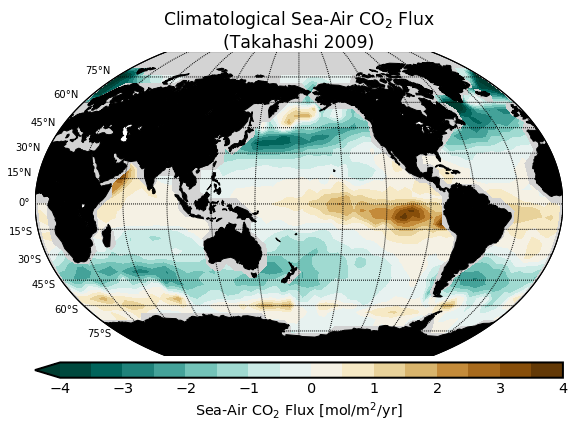

In [101]:
fig = plt.figure(figsize=(14,6))
ax = plt.subplot(111)
m = setup_map(ax)
m.contourf(xx, yy, takahashi, np.arange(-4,4.1,0.5),
             latlon=True, cmap="BrBG_r", extend='min')
ax.set_title('Climatological Sea-Air CO$_{2}$ Flux' + '\n' + '(Takahashi 2009)')
cb = m.colorbar(location='bottom')
cb.outline.set_edgecolor('k')
cb.outline.set_linewidth(2)
cb.set_label('Sea-Air CO$_{2}$ Flux [mol/m$^{2}$/yr]')

#plt.savefig('takahashi_map.png', transparent=True, format='eps', 
#            bbox_inches='tight', pad_inches=1, dpi=1000)